In [1]:
from code_.preprocessing.preprocess_sentences import prepare_list_of_sentences
from code_.vectorization.TFIDF import TFIDF_Model

import seaborn as sns
sns.set_style("whitegrid")


In [2]:
list_of_sentences = prepare_list_of_sentences(path_to_dataset="preprocessed_dataset_more_stopwords.csv")



In [3]:
tfidf_model = TFIDF_Model(corpus=list_of_sentences)

In [4]:
matrix = tfidf_model.vectors[:20000].todense()

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
reduced_data = PCA(n_components=2).fit_transform(matrix)

c:\Users\danie\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [11]:
clustering_model = KMeans(
    n_clusters=10,
    max_iter=300,
)

labels = clustering_model.fit_predict(tfidf_model.vectors[:20000])

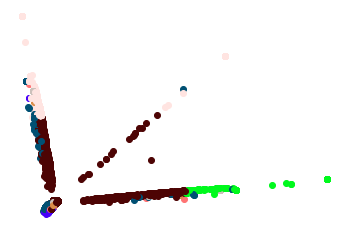

In [14]:
fig, ax = plt.subplots()
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.set_axis_off()
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

c:\Users\danie\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\danie\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
c:\Users\danie\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


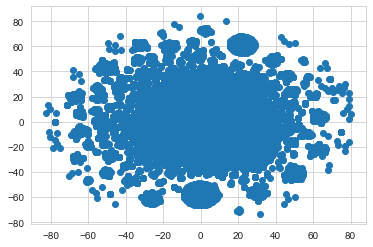

In [15]:
embeddings = TSNE(n_components=2)
Y = embeddings.fit_transform(matrix)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

In [16]:
from yellowbrick.text import TSNEVisualizer,UMAPVisualizer

c:\Users\danie\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
c:\Users\danie\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\danie\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D

AttributeError: 'TSNEVisualizer' object has no attribute 'classes'

AttributeError: 'TSNEVisualizer' object has no attribute 'classes'

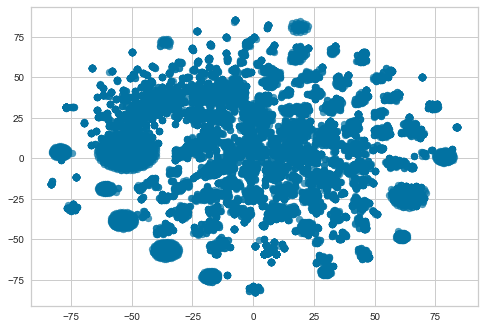

In [17]:
viz = TSNEVisualizer(alpha = 0.7)
viz.fit(matrix)